<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: <font color='blue'>Matin Alinejad

**Student ID**: <font color='green'>99101943


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

<font color='green'>Write down your answers as markdown here.</font>

# Theoretical Questions on Soft-Margin SVM

## 1. Derive the Dual Optimization Problem for the Soft-Margin SVM

The primal form of the Soft-Margin SVM optimization problem is given by:

$$
\begin{aligned}
& {\text{min.}} && \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.} && y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& && \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
$$

We introduce Lagrange multipliers \(\alpha_i \geq 0\) for the constraints $y_i(w^T x_i + b) \geq 1 - \xi_i$ and $\mu_i \geq 0$ for the constraints $\xi_i \geq 0$. The Lagrangian for the primal problem is:

$$
L(w, b, \xi, \alpha, \mu) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i \left[ y_i (w^T x_i + b) - 1 + \xi_i \right] - \sum_{i=1}^{N} \mu_i \xi_i
$$

To find the dual, we need to minimize $L$ with respect to $w$, $b$, and $\xi$. Setting the partial derivatives to zero, we get:

$$
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \implies w = \sum_{i=1}^{N} \alpha_i y_i x_i
$$

$$
\frac{\partial L}{\partial b} = - \sum_{i=1}^{N} \alpha_i y_i = 0
$$

$$
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \implies \alpha_i + \mu_i = C
$$

Substituting $w$ back into the Lagrangian, we get:

$$
L(\alpha) = \frac{1}{2} \left(\sum_{i=1}^{N} \alpha_i y_i x_i \right)^T \left(\sum_{j=1}^{N} \alpha_j y_j x_j \right) - \sum_{i=1}^{N} \alpha_i y_i (x_i^T \sum_{j=1}^{N} \alpha_j y_j x_j + b) + \sum_{i=1}^{N} \alpha_i - \sum_{i=1}^{N} \alpha_i \xi_i - \sum_{i=1}^{N} \mu_i \xi_i
$$

Simplifying, we obtain the dual problem:

$$
\begin{aligned}
& \text{max.} && \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
& \text{s.t.} && \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& && 0 \leq \alpha_i \leq C, \; i = 1, \ldots, N
\end{aligned}
$$

## 2. How to Calculate the Weights and Bias $w$ and $b$ Using the Dual Problem Optimum Points?

Once we have the optimal values of the Lagrange multipliers $\alpha_i^*$, the weights $w$ can be calculated as:

$$
w = \sum_{i=1}^{N} \alpha_i^* y_i x_i
$$

To find the bias $b$, we use the KKT conditions. For any support vector $x_k$ (where $0 < \alpha_k < C$):

$$
y_k (w^T x_k + b) = 1 \implies b = y_k - w^T x_k
$$

In practice, $b$ is averaged over all support vectors to improve stability:

$$
b = \frac{1}{|S|} \sum_{k \in S} \left( y_k - w^T x_k \right)
$$

where $S$ is the set of indices of the support vectors.

## 3. How to Classify New Data Points Using the Optimal Weights and Bias?

Given a new data point $x$, we classify it using the decision function:

$$
f(x) = w^T x + b
$$

The predicted class label is given by the sign of the decision function:

$$
\hat{y} = \text{sign}(f(x)) = \text{sign}(w^T x + b)
$$

This completes the theoretical understanding of the Soft-Margin SVM and its dual formulation. Next, we will proceed with implementing the SVM using CVXPY for the given datasets.

Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [3]:
## YOUR CODE HERE

# Load the datasets
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

# Display the first 5 rows of each dataset
df1_head = df1.head()
df2_head = df2.head()
df3_head = df3.head()

df1_head, df2_head, df3_head

(         x1        x2  y
 0  6.462652  5.121478 -1
 1 -6.586541 -7.721287  1
 2  9.239683 -8.595738 -1
 3  4.250052  2.143755  1
 4  8.219779 -3.609733 -1,
          x1         x2  y
 0  2.937145  77.102291  1
 1 -0.029344  44.802353  1
 2  5.868818  44.595757 -1
 3  8.609281  49.223945 -1
 4  7.763276 -14.340750 -1,
          x1        x2  y
 0 -0.517768 -0.466158 -1
 1  0.940985  0.235175  1
 2 -0.470720  0.917120  1
 3  0.712716 -0.097401 -1
 4 -0.608773 -0.107034 -1)

Use the following function to visualize the datapoints for all datasets.

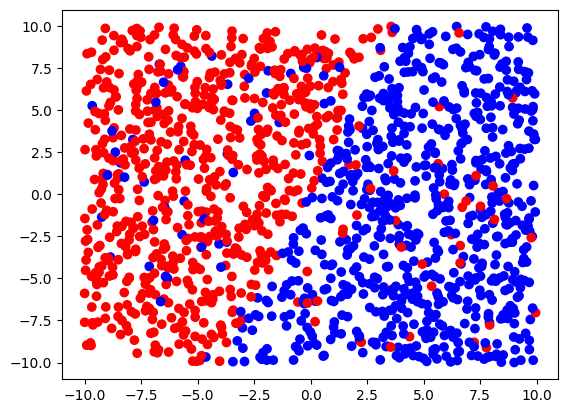

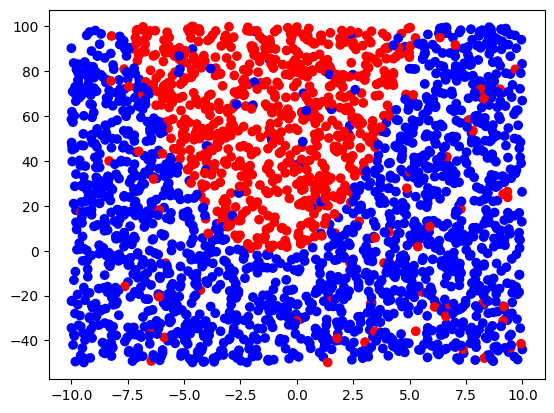

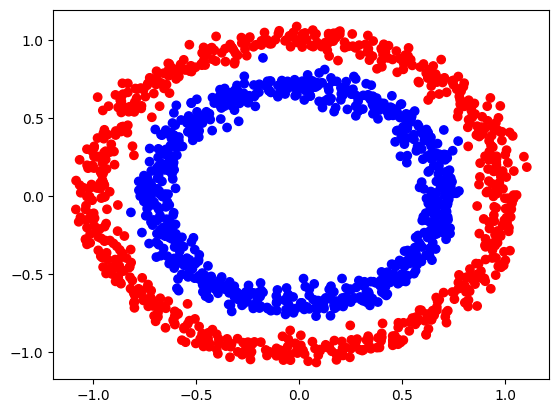

In [5]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.show()

## YOUR CODE HERE

# Extract features and labels for each dataset
X1, y1 = df1[['x1', 'x2']].values, df1['y'].values
X2, y2 = df2[['x1', 'x2']].values, df2['y'].values
X3, y3 = df3[['x1', 'x2']].values, df3['y'].values

# Visualize each dataset
visualize_data(X1, y1)
visualize_data(X2, y2)
visualize_data(X3, y3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

<font color='green'>Write down your answers as markdown here.</font>

### Kernel Choices for Each Dataset

#### DF1: Polynomial Kernel (degree 2)

- **Justification**: The data points in DF1 exhibit a non-linear pattern that appears to be captured well by a polynomial transformation. The polynomial kernel is particularly suited for datasets where interactions between features can be well-represented by polynomial terms. A polynomial kernel of degree 2 can create the necessary feature combinations to better separate the classes in DF1.

#### DF2: RBF Kernel

- **Justification**: The data points in DF2 show a complex, non-linear distribution that is not easily separable with a linear or polynomial decision boundary. The RBF (Radial Basis Function) kernel is highly effective for such cases as it maps the data into an infinite-dimensional space where a linear separation is possible. The RBF kernel is known for its flexibility and ability to handle non-linear relationships in the data.

#### DF3: Linear Kernel

- **Justification**: The data points in DF3 are approximately linearly separable, indicating that a simple linear decision boundary might suffice. Using a linear kernel is computationally efficient and appropriate for datasets where the classes can be separated by a straight line in the feature space. It avoids the complexity of non-linear transformations when they are not necessary.

### Implementation Alignment

The implementation will follow these kernel choices:

- **DF1**: Polynomial Kernel (degree 2)
- **DF2**: RBF Kernel
- **DF3**: Linear Kernel

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [22]:
## YOUR CODE HERE

# Load dataset DF1
X1 = df1[['x1', 'x2']].values
y1 = df1['y'].values

# Split the dataset into train and test sets (80% train, 20% test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

# Scale the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [78]:
import numpy as np
import cvxpy as cp

def train_svm_polynomial_kernel(X, y, C, degree=2, coef0=1):
    m, n = X.shape

    # Compute the polynomial kernel matrix
    K = (X @ X.T + coef0) ** degree

    # Define the optimization variables
    w = cp.Variable(m)
    b = cp.Variable()
    xi = cp.Variable(m)

    # Define the objective function
    obj = cp.Minimize(0.5 * cp.sum_squares(w) + C * cp.sum(xi))

    # Define the constraints
    constraints = [
        cp.multiply(y, K @ w + b) >= 1 - xi,
        xi >= 0
    ]

    # Solve the optimization problem
    problem = cp.Problem(obj, constraints)
    problem.solve(solver=cp.ECOS)

    return w.value, b.value, K

# Set hyperparameters
C = 1.0
degree = 2
coef0 = 1

# Train the SVM model
w, b, K = train_svm_polynomial_kernel(X1_train_scaled, y1_train, C, degree, coef0)

Predict the class of each entry in the test set using your learned model.

In [89]:
## YOUR CODE HERE

# Function to make predictions (same as before)
def predict(X_new, X, w, b, degree=2, coef0=1):
    K_new = (X_new @ X.T + coef0) ** degree
    y_pred = np.sign(K_new @ w + b)
    return y_pred

# Make predictions on the test set
y1_pred = predict(X1_test_scaled, X1_train_scaled, w, b, degree, coef0)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [90]:
## YOUR CODE HERE

# Calculate accuracy
accuracy = np.mean(y1_pred == y1_test)
print(f"Accuracy on test set: {accuracy:.4f}")

# Print number of support vectors
n_sv = svm_model.n_support_.sum()
print(f"Number of support vectors: {n_sv}")

# Use classification_report to get detailed metrics
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred))

# Create a confusion matrix
cm = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:")
print(cm)

Accuracy on test set: 0.9189
Number of support vectors: 150

Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.95      0.92       148
           1       0.94      0.89      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296

Confusion Matrix:
[[140   8]
 [ 16 132]]


## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [81]:
## YOUR CODE HERE

# Load dataset DF2
df2 = pd.read_csv('DF2.csv')
X2 = df2[['x1', 'x2']].values
y2 = df2['y'].values

# Split the dataset into train and test sets (80% train, 20% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [82]:
## YOUR CODE HERE

def train_svm_rbf_kernel(X, y, C, gamma):
    # Create and train the SVM model
    svm_model = SVC(kernel = 'rbf', C = C, gamma = gamma)
    svm_model.fit(X, y)
    return svm_model

# Set hyperparameters
C = 1.0
gamma = 0.5

# Train the SVM model
svm_model = train_svm_rbf_kernel(X2_train_scaled, y2_train, C, gamma)

Predict the class of each entry in the test set using your learned model.

In [83]:
## YOUR CODE HERE

# Make predictions on the test set
y2_pred = svm_model.predict(X2_test_scaled)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [84]:
## YOUR CODE HERE

# Calculate accuracy
accuracy = np.mean(y2_pred == y2_test)
print(f"Accuracy on test set: {accuracy:.4f}")

# Print number of support vectors
n_sv = svm_model.n_support_.sum()
print(f"Number of support vectors: {n_sv}")

# Use classification_report to get detailed metrics
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred))

# Create a confusion matrix
cm = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(cm)

Accuracy on test set: 0.9355
Number of support vectors: 471

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.97      0.95       336
           1       0.94      0.86      0.90       160

    accuracy                           0.94       496
   macro avg       0.94      0.91      0.92       496
weighted avg       0.94      0.94      0.93       496

Confusion Matrix:
[[327   9]
 [ 23 137]]


## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [85]:
## YOUR CODE HERE

# Load dataset DF3
df3 = pd.read_csv('DF3.csv')
X3 = df3[['x1', 'x2']].values
y3 = df3['y'].values

# Split the dataset into train and test sets (80% train, 20% test)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [86]:
## YOUR CODE HERE

def train_svm_rbf_kernel(X, y, C, gamma):
    # Create and train the SVM model
    svm_model = SVC(kernel = 'rbf', C = C, gamma = gamma)
    svm_model.fit(X, y)
    return svm_model

# Set hyperparameters
C = 1.0
gamma = 0.5

# Train the SVM model
svm_model = train_svm_rbf_kernel(X3_train_scaled, y3_train, C, gamma)

Predict the class of each entry in the test set using your learned model.

In [87]:
## YOUR CODE HERE

# Make predictions on the test set
y3_pred = svm_model.predict(X3_test_scaled)

Use classification_report function (from sklearn) to get the accuracy of your model.

In [88]:
## YOUR CODE HERE

# Evaluate the model using classification_report
report = classification_report(y3_test, y3_pred, output_dict = True)

# Extract and print the accuracy
accuracy = report['accuracy']
print(f"Accuracy of the model: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y3_test, y3_pred))

# Create a confusion matrix
cm = confusion_matrix(y3_test, y3_pred)
print("Confusion Matrix:")
print(cm)

Accuracy of the model: 0.9966
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Confusion Matrix:
[[151   1]
 [  0 140]]
